<a href="https://colab.research.google.com/github/lareynolds/QB-EDA/blob/main/Univariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
# import and store the dataset
qbs = pd.read_excel("https://myordinaryjourney.com/wp-content/uploads/2023/09/cleaned_qbs.xlsx")

In [4]:
print(qbs.head())

      Player  Total  2009  2010  2011  2012  2013  2014  2015  2016  ...  \
0   A.Dalton     25     0     0     4     1     1     5     0     1  ...   
1     A.Luck     17     0     0     0     5     3     4     1     1  ...   
2  A.Rodgers     41     3     3     3     5     2     2     5     4  ...   
3    A.Smith     23     1     1     1     1     1     6     4     1  ...   
4  B.Bortles     12     0     0     0     0     0     1     2     1  ...   

   2023  Games  Per Game  Attempts  Per 100 Att  Sacked  Per Sack  \
0     0    170      0.15      5557         0.45     361     0.069   
1     0     94      0.18      3620         0.47     186     0.091   
2     0    228      0.18      7840         0.52     542     0.076   
3     0    149      0.15      4648         0.49     367     0.063   
4     0     79      0.15      2719         0.44     201     0.060   

   Sack Per Att  Third Down %  qboc  
0         0.065         40.00     0  
1         0.051         29.41     0  
2         0.06

In [5]:
qbs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        66 non-null     object 
 1   Total         66 non-null     int64  
 2   2009          66 non-null     int64  
 3   2010          66 non-null     int64  
 4   2011          66 non-null     int64  
 5   2012          66 non-null     int64  
 6   2013          66 non-null     int64  
 7   2014          66 non-null     int64  
 8   2015          66 non-null     int64  
 9   2016          66 non-null     int64  
 10  2017          66 non-null     int64  
 11  2018          66 non-null     int64  
 12  2019          66 non-null     int64  
 13  2020          66 non-null     int64  
 14  2021          66 non-null     int64  
 15  2022          66 non-null     int64  
 16  2023          66 non-null     int64  
 17  Games         66 non-null     int64  
 18  Per Game      66 non-null     fl

The variables I will examine more closely are the total number of Roughing the Passer (RTP) calls per quarterback, the number of RTP calls per year for each quarterback, and the number of RTP calls per games played for their distribution, central tendency, and variance. I will be using Python and Jupyter Notebooks.

In [6]:
table_stats = qbs.describe()

In [7]:
print(table_stats)

           Total       2009       2010       2011       2012       2013  \
count  66.000000  66.000000  66.000000  66.000000  66.000000  66.000000   
mean   18.090909   0.696970   0.833333   1.121212   1.257576   1.075758   
std    12.505663   1.176301   1.452672   1.767355   1.774266   1.825550   
min     2.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     8.250000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%    15.500000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%    24.750000   1.000000   1.000000   2.000000   2.000000   1.000000   
max    57.000000   5.000000   6.000000   8.000000   6.000000   8.000000   

            2014       2015       2016      2017  ...       2023       Games  \
count  66.000000  66.000000  66.000000  66.00000  ...  66.000000   66.000000   
mean    1.333333   1.454545   1.287879   1.30303  ...   0.030303   99.530303   
std     1.842518   1.832878   1.698553   1.75385  ...   0.172733   53.915952   
min 

Well, that was easy. Using the [.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function allows for the examination of the data set's values for central tendency (mean in this case) and the spread (standard deviation) and dispersion (technically). Although all the information is present to observe the dispersion of the information, it may hard to conceptualize the shape without using a visualization help. [Histograms](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) can aid in our observations.

array([[<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': '2009'}>,
        <Axes: title={'center': '2010'}>,
        <Axes: title={'center': '2011'}>,
        <Axes: title={'center': '2012'}>],
       [<Axes: title={'center': '2013'}>,
        <Axes: title={'center': '2014'}>,
        <Axes: title={'center': '2015'}>,
        <Axes: title={'center': '2016'}>,
        <Axes: title={'center': '2017'}>],
       [<Axes: title={'center': '2018'}>,
        <Axes: title={'center': '2019'}>,
        <Axes: title={'center': '2020'}>,
        <Axes: title={'center': '2021'}>,
        <Axes: title={'center': '2022'}>],
       [<Axes: title={'center': '2023'}>,
        <Axes: title={'center': 'Games'}>,
        <Axes: title={'center': 'Per Game'}>,
        <Axes: title={'center': 'Attempts'}>,
        <Axes: title={'center': 'Per 100 Att'}>],
       [<Axes: title={'center': 'Sacked'}>,
        <Axes: title={'center': 'Per Sack'}>,
        <Axes: title={'center': 'Sack Per Att'}>,

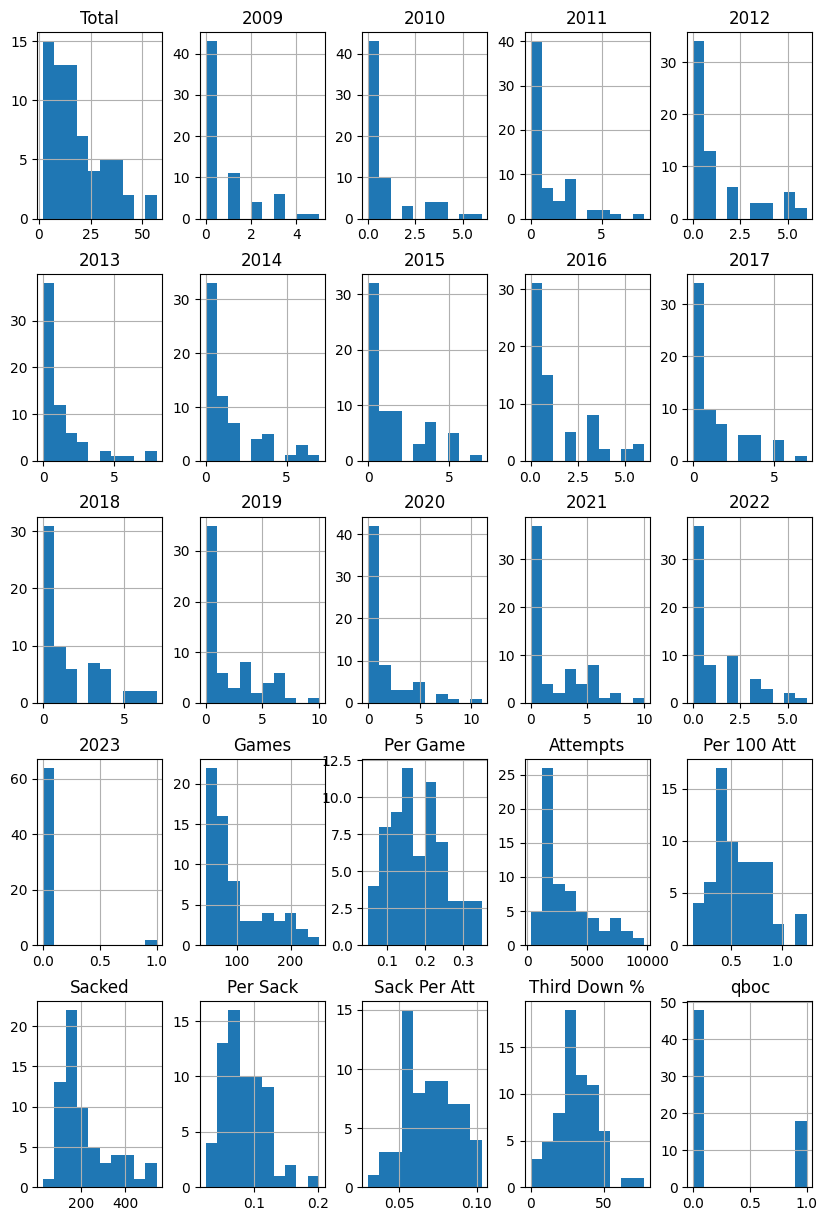

In [8]:
qbs.hist(figsize=(10, 15))

Adjust the figure size to be able to view all of the histogram outputs more clearly. The distributions for Per Game and Per 100 Attempts look nearly normal, so that will allow us to use some parametric tests for analysis.

Another visual that is helpful to see the distribution is a [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html) (box-and whisker plot). This time, let's just look at just the Per Game and Per 100 Attempts.

<Axes: >

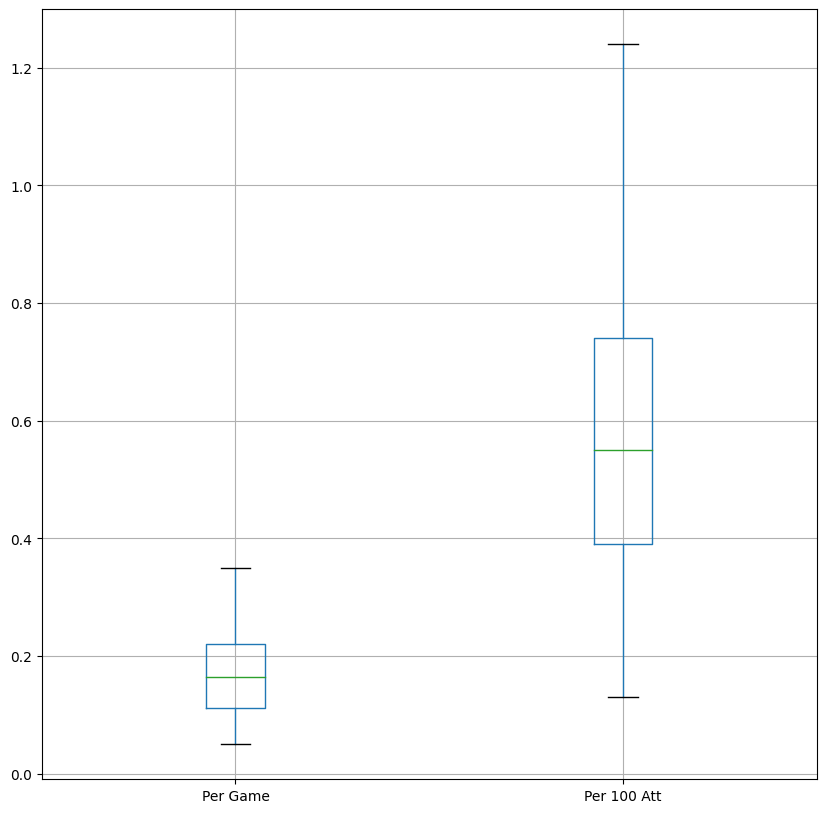

In [12]:
qbs.boxplot(column=['Per Game', 'Per 100 Att'], figsize=(10,10))

The nice things about boxplots is that it makes it easy to identify outliers -  observations that are outside the whiskers (either top or bottom). You can also easily see the centrality and spread of the data.

One additional vaiable that we should take a look at is the 'qboc'. Did you notice in that there was an interesting distribution when the histograms plotted above? Let's take a closer look.

<Axes: >

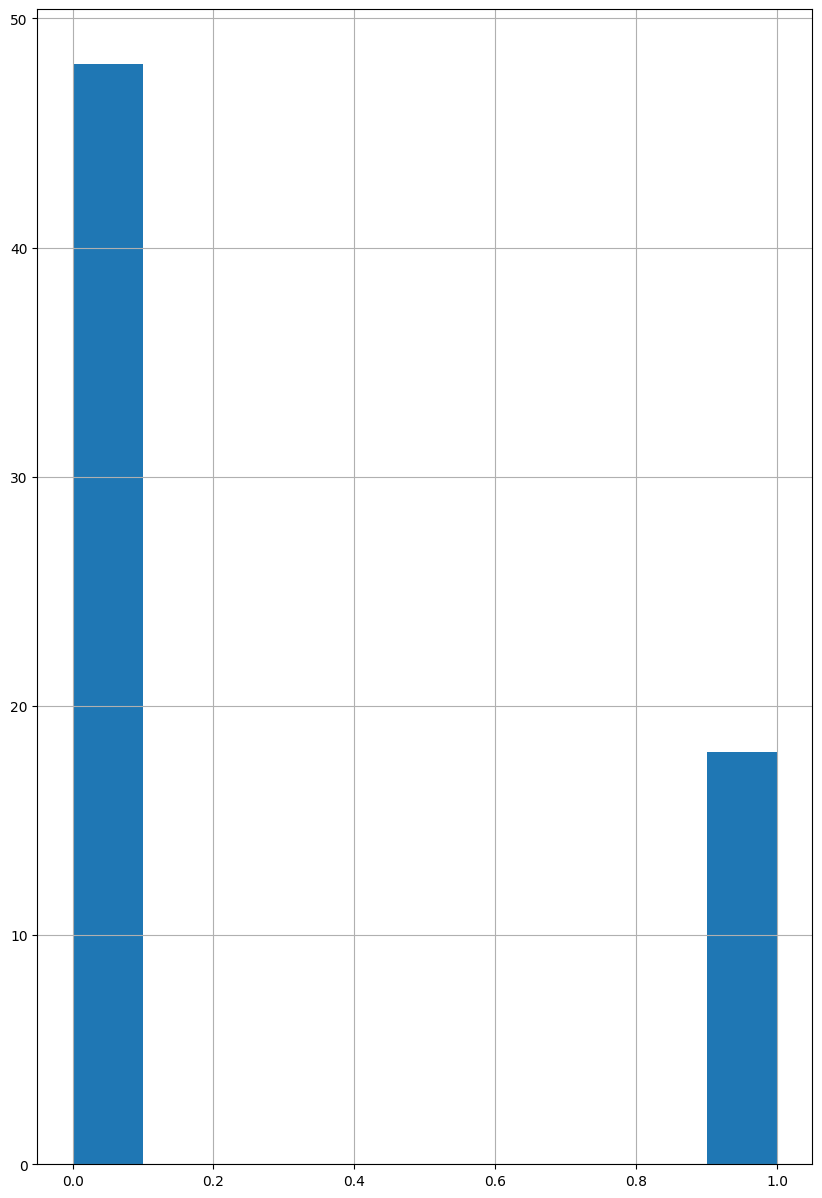

In [10]:
qbs['qboc'].hist(figsize=(10, 15))

As you can see there are only two values for this variable. And this makes sense since we are categorizing the quarterbacks based on if they are (1) or are not (0) a quarterback of color. I'm going to do a bit of foreshadowing, but this means that if we wanted to do any sort of predictive analysis, we need to think about some additional models beyond regular linear regression, logistic regression to be specific... but that is a post for another day. For now, I have identified the variables we can use for some multivariate analysis:

*   Per Game
*   Per 100 Attempts
*   qboc